In [1]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors, MACCSkeys
from rdkit.ML.Descriptors import MoleculeDescriptors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.ensemble import RandomForestClassifier

# 1. Import data

In [2]:
train_datasets = pd.read_csv('/home/mrcong/code/python/mylab-panHDAC/data/survey/dataset_size/subsampled_train_dataset.csv')

In [3]:
validation_dataset = pd.read_excel("../../data/train_test_data/NoCL/20240307_pan_HDAC_train_test_data.xlsx", sheet_name='validation_dataset')
print(len(validation_dataset))

229


# 2. Model training with Morgan2 fingerprint

## Morgan2 fingerprint encoding

In [46]:
#MACCS
from tqdm import tqdm

def maccs_fpts(data):
    Maccs_fpts = []
    count = 0
    with tqdm(total=len(data), desc='Progress') as pbar:
        for i in data:
            try:
                mol = Chem.MolFromSmiles(i)
            except:
                print("An exception occurred with " + str(count))
                continue
            fpts = MACCSkeys.GenMACCSKeys(mol)
            mfpts = np.array(fpts)
            Maccs_fpts.append(mfpts)
            count += 1
            pbar.update(1)  # Update the progress bar
    return np.array(Maccs_fpts)

#maccs
def morgan_fpts(data):
    Morgan_fpts = []
    count = 0
    with tqdm(total=len(data), desc='Progress') as pbar:
        for i in data:
            try:
                mol = Chem.MolFromSmiles(i)
            except:
                print("An exception occurred with " + str(count))
                continue
            fpts = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)
            mfpts = np.array(fpts)
            Morgan_fpts.append(mfpts)
            count += 1
            pbar.update(1)  # Update the progress bar
    return np.array(Morgan_fpts)

In [57]:
#X data
X_Validation = maccs_fpts(validation_dataset['SMILES'])
y_Validation = np.array(validation_dataset['Bioactivity'])

#Y data
#Original data
print("Original data:")
print(y_Validation[0:5])
#Encoding labels
label_encoder = preprocessing.LabelEncoder()
y_Validation = label_encoder.fit_transform(y_Validation)
#Class encoded
print("Class encoded:")
print(list(label_encoder.classes_))
print(label_encoder.transform(label_encoder.classes_))
print("Encoded data:")
print(y_Validation[0:5])

Progress:   0%|          | 0/229 [00:00<?, ?it/s][11:26:27] Conflicting single bond directions around double bond at index 9.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:26:27] Conflicting single bond directions around double bond at index 7.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
Progress:  57%|█████▋    | 131/229 [00:00<00:00, 1309.66it/s][11:26:27] Conflicting single bond directions around double bond at index 16.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:26:27] Conflicting single bond directions around double bond at index 25.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
Progress: 100%|██████████| 229/229 [00:00<00:00, 1299.05it/s]

Original data:
['inactive' 'active' 'inactive' 'inactive' 'active']
Class encoded:
['active', 'inactive']
[0 1]
Encoded data:
[1 0 1 1 0]


## Model training

In [58]:
np.linspace(0, 1, num=21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [59]:
train_datasets.columns

Index(['Unnamed: 0', 'index', 'MOL_ID', 'SMILES', 'Bioactivity',
       'subsample_size', 'rand_seed'],
      dtype='object')

In [60]:
train_datasets

,Unnamed: 0,index,MOL_ID,SMILES,Bioactivity,subsample_size,rand_seed
0,533,882,184207,O=C(CCCCCCS)Nc(cc1)ccc1-c1ccccc1,inactive,0.05,0
1,375,617,24894642,CCSC(=S)SCC(=O)C1=CC=C(C=C1)NC(=O)C2=CC3=CC=CC...,inactive,0.05,0
2,306,506,161975,CC(C)C[C@H](CC(N1[C@@H](Cc2ccccc2)C(NCCCCCC(NO...,inactive,0.05,0
3,627,1029,24944935,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC=CC(=C3)C#C)OCCC...,inactive,0.05,0
4,481,801,2293760,Cc1c(ccc(N(C)c2ccnc(Nc(cc3)ccc3C(NCCCCC(NO)=O)...,inactive,0.05,0
...,...,...,...,...,...,...,...
101185,274,689,129010543,C1=CSC(=C1)COC2=CC=C(C=C2)/C=C/C(=O)NO,active,0.95,9
101186,12,32,2062387,COc(cc(c1c2)ncnc1Nc(cc1)ccc1F)c2OCCCCCC(NO)=O,active,0.95,9
101187,120,305,10378404,C1=CC(=CC=C1SC/C=C/C=C/C(=O)NO)Cl,active,0.95,9
101188,380,953,1589192,Cc(cc1)cc(N)c1NC(/C=C/c(cc1)cc(OC)c1OCC(Nc1cc(...,active,0.95,9


In [61]:
from sklearn.metrics import accuracy_score, f1_score
result_dict = {
    "Model name": [],
    "Fingerprint": [],
    "Val_ACC": [],
    "Val_F1": [],
    "Subsample_size": [],
    "Random_seed": []
}
for subsample_size in np.round(np.linspace(0.05, 0.95, num=19), decimals=2):    
    for seed in range(10): 
        filtered_df = train_datasets[(train_datasets["subsample_size"] == subsample_size) & (train_datasets["rand_seed"] == seed)]
        ss_model = RandomForestClassifier(n_estimators=200, criterion="gini", random_state=42)
        X_train = maccs_fpts(filtered_df["SMILES"])
        y_train = label_encoder.transform(filtered_df["Bioactivity"])
        ss_model.fit(X_train, y_train)
        y_hat = ss_model.predict(X_Validation)
        
        result_dict["Model name"].append("Random Forest")
        result_dict["Fingerprint"].append("Morgan2")
        result_dict["Val_ACC"].append(accuracy_score(y_true=y_Validation, y_pred=y_hat))
        result_dict["Val_F1"].append(f1_score(y_true=y_Validation, y_pred=y_hat))
        result_dict["Subsample_size"].append(subsample_size)
        result_dict["Random_seed"].append(seed)

Progress:   0%|          | 0/52 [00:00<?, ?it/s][11:26:27] Conflicting single bond directions around double bond at index 17.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:26:27] Conflicting single bond directions around double bond at index 26.
[11:26:27]   BondStereo set to STEREONONE and single bond directions set to NONE.
Progress:   0%|          | 0/52 [00:00<?, ?it/s][11:26:28] Conflicting single bond directions around double bond at index 21.
[11:26:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
Progress:   0%|          | 0/52 [00:00<?, ?it/s][11:26:28] Conflicting single bond directions around double bond at index 21.
[11:26:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
Progress:   0%|          | 0/52 [00:00<?, ?it/s][11:26:28] Conflicting single bond directions around double bond at index 7.
[11:26:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:26:28

In [62]:
result_df = pd.DataFrame(result_dict)
result_df

,Model name,Fingerprint,Val_ACC,Val_F1,Subsample_size,Random_seed
0,Random Forest,Morgan2,0.620087,0.743363,0.05,0
1,Random Forest,Morgan2,0.545852,0.648649,0.05,1
2,Random Forest,Morgan2,0.580786,0.717647,0.05,2
3,Random Forest,Morgan2,0.576419,0.679868,0.05,3
4,Random Forest,Morgan2,0.593886,0.715596,0.05,4
...,...,...,...,...,...,...
185,Random Forest,Morgan2,0.563319,0.673203,0.95,5
186,Random Forest,Morgan2,0.537118,0.646667,0.95,6
187,Random Forest,Morgan2,0.550218,0.657807,0.95,7
188,Random Forest,Morgan2,0.563319,0.673203,0.95,8


In [63]:
result_df.to_excel("../../results/survey/data_size/data_size_survey_result.xlsx", index=False)

In [64]:
filtered_df = result_df[(result_df["Subsample_size"] == 0.05)]
filtered_df.head()

,Model name,Fingerprint,Val_ACC,Val_F1,Subsample_size,Random_seed
0,Random Forest,Morgan2,0.620087,0.743363,0.05,0
1,Random Forest,Morgan2,0.545852,0.648649,0.05,1
2,Random Forest,Morgan2,0.580786,0.717647,0.05,2
3,Random Forest,Morgan2,0.576419,0.679868,0.05,3
4,Random Forest,Morgan2,0.593886,0.715596,0.05,4


In [65]:
summary_dict = {
    "Model name": [],
    "Fingerprint": [],
    "mean_val_ACC": [],
    "std_val_ACC": [],
    "mean_val_F1": [],
    "std_val_F1": [],
    "subsample_size": []
}
for subsample_size in result_df["Subsample_size"].unique():
    filtered_df = result_df[(result_df["Subsample_size"] == subsample_size)]
    summary_dict["Model name"].append(result_df.loc[:,"Model name"].unique()[0])
    summary_dict["Fingerprint"].append(result_df.loc[:,"Fingerprint"].unique()[0])
    summary_dict["mean_val_ACC"].append(np.mean(filtered_df["Val_ACC"]))
    summary_dict["std_val_ACC"].append(np.std(filtered_df["Val_ACC"]))
    summary_dict["mean_val_F1"].append(np.mean(filtered_df["Val_F1"]))
    summary_dict["std_val_F1"].append(np.std(filtered_df["Val_F1"]))
    summary_dict["subsample_size"].append(subsample_size)
summary_df = pd.DataFrame(summary_dict)
summary_df.head()

,Model name,Fingerprint,mean_val_ACC,std_val_ACC,mean_val_F1,std_val_F1,subsample_size
0,Random Forest,Morgan2,0.573799,0.029176,0.694189,0.034290,0.05
1,Random Forest,Morgan2,0.569432,0.042212,0.689585,0.045860,0.10
2,Random Forest,Morgan2,0.559825,0.032196,0.669076,0.036197,0.15
3,Random Forest,Morgan2,0.553712,0.029733,0.665312,0.031647,0.20
4,Random Forest,Morgan2,0.565066,0.020125,0.668530,0.022514,0.25


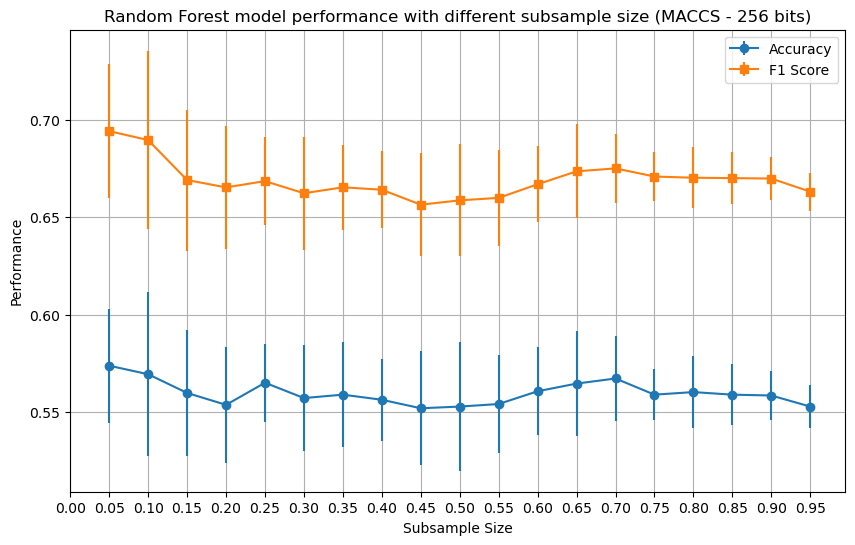

In [66]:
# Set up the plot
plt.figure(figsize=(10, 6))
plt.errorbar(summary_df["subsample_size"], summary_df["mean_val_ACC"], yerr=summary_df["std_val_ACC"], marker="o", label="Accuracy")
plt.errorbar(summary_df["subsample_size"], summary_df["mean_val_F1"], yerr=summary_df["std_val_F1"], marker="s", label="F1 Score")

# Customize the plot
plt.xlabel("Subsample Size")
plt.ylabel("Performance")
plt.title(f"Random Forest model performance with different subsample size (MACCS - 256 bits)")
plt.grid(True)
plt.xticks(np.arange(0, 1, 0.05))  # Set custom y-axis ticks


plt.legend()

# Show the plot
plt.show()